In [1]:
import pandas as pd
df = pd.read_csv("results_extended_priority_and_parcut.csv")
df


Unnamed: 0  is_additional dna region ILS   n  r  replicate  \
0              0          False    introns   M  12  9          1   
1              1          False    introns   M  12  9          2   
2              2          False    introns   M  12  9          3   
3              3          False    introns   M  12  9          4   
4              4          False    introns   M  12  9          5   
...          ...            ...        ...  ..  .. ..        ...   
3995        3995           True      exons   H  20  6          9   
3996        3996           True      exons   H  20  6         10   
3997        3997           True      exons   H  20  6         11   
3998        3998           True      exons   H  20  6         12   
3999        3999           True      exons   H  20  6         13   

                                                network  \
0     (((((((t10)#I,t3),#E))#B,(((t11)#H,(((#G,t4))#...   
1     ((#B,(#I,(((t6,(t5)#F),(t12)#A),(t9)#B))),(#A,...   
2     ((((((t9,(t11)#B))#E,((#H,(((t12)#I,t8),((t4)#...   
3     (((t6,(t10)#B),(t9)#F),(#A,((#F,(#G,((t2)#I,t5...   
4     ((((t4,#H))#B,((t1)#H,(t5,#D))),(((#C,(((t3,(t...   
...                                                 ...   
3995  (((((t11,(t9,(((t20,((((t17)#C,t16),#C))#E),(t...   
3996  (((((t9,(t2,t19)),(#B,(t20,((t12,(t5,(t14)#F))...   
3997  (((((t1,t13),(#F,((t9,((t12,t14))#B),(#A,((t17...   
3998  ((t6,(#B,(t1,(t20)#E))),((((t15)#C,t13),(((t9,...   
3999  ((((t16,((t15,((t3,(t19)#D))#C))#A),(t17)#F),(...   

                                         displayed_tree  \
0     (((t4:6216133.68160099,(t10:4324629.61600000,t...   
1     ((t9:9087059.17986841,(t10:8460890.45819233,(t...   
2     (((t5:5736952.53223690,(t8:3727508.24000000,t1...   
3     ((t9:5712528.06000000,(t10:3213972.54000000,t6...   
4     (t5:9999999.99990000,((t7:6790909.33207767,((t...   
...                                                 ...   
3995  (((t7:389987.48490000,t14:389987.48490000):932...   
3996  ((((t9:118398.04810000,(t2:12817.40693000,t19:...   
3997  (((t5:120180.52190000,t4:120180.52190000):3743...   
3998  ((t6:224877.82770000,(t12:216601.87394231,(t20...   
3999  (t11:500000.00000000,((((t19:34480.01919000,t3...   

                                              gene tree  ... is_correct  \
0     ((((t12:0.44877792,t11:0.65233180):0.60752937,...  ...       True   
1     ((t9:0.63767061,(((t5:0.00834263,t6:0.00923889...  ...       True   
2     (((t4:0.85331962,((t1:1.92088261,(((t7:0.43063...  ...       True   
3     ((t9:0.17234057,(t10:0.19534936,t6:0.16493770)...  ...       True   
4     (t5:0.00079948,(((t11:0.00071099,t8:0.00048214...  ...       True   
...                                                 ...  ...        ...   
3995  (((t7:0.03823434,t14:0.03006876):0.00074756,((...  ...       True   
3996  (((((t20:0.00135739,t12:0.00076895):0.00006615...  ...       True   
3997  ((t10:0.25350793,(t20:0.01636883,t16:0.0319036...  ...       True   
3998  (((t4:0.04093396,t13:0.04947516):0.00622070,(t...  ...       True   
3999  ((((t2:0.07873932,t6:0.09298383):0.09943354,t1...  ...       True   

            rf  dp_called_fast_algo  branching_count_fast_algo  \
0     0.100000                  3.0                        1.0   
1     0.200000                 11.0                        6.0   
2     0.300000                 21.0                       11.0   
3     0.200000                 13.0                        8.0   
4     0.800000                 59.0                       34.0   
...        ...                  ...                        ...   
3995  0.888889                 14.0                       13.0   
3996  0.500000                  4.0                        3.0   
3997  0.555556                  7.0                        6.0   
3998  0.777778                 31.0                       15.0   
3999  0.611111                 14.0                       13.0   

      max_depth_fast_algo  best_depth_fast_algo  time_in_seconds_fast_algo  \

In [2]:
from netop import Network
from treeop import compcostsmp, str2tree, Tree
import time
from tqdm import tqdm

def save_naive_time(network, tree):
    min_cost = float("inf")
    start_time = time.time()
    for t in network.displayedtrees():
        min_cost = min(min_cost, compcostsmp(tree, Tree(str2tree(t)), "R"))
    end_time = time.time()
    naive_time = end_time - start_time
    return naive_time, min_cost

def save_stats(network_str, tree_str):
    network_str, tree_str = network_str.strip(";"), tree_str.strip(";")
    network, tree = Network(str2tree(network_str)), Tree(str2tree(tree_str))
    time_naive, cost_naive = save_naive_time(network, tree)
    return time_naive, cost_naive

full_labels = ["time_naive_python", "cost_naive_python"]
tqdm.pandas()
output_df = df.progress_apply(lambda row: pd.Series(save_stats(row['network'], row['gene_tree_rooted']), index=full_labels), axis=1)
result_df = pd.concat([df, output_df], axis=1)

100%|██████████| 4000/4000 [13:13<00:00,  5.04it/s]  


In [4]:
import numpy as np
result_df["log_naive_time_python"] = np.log2(result_df["time_naive_python"])
result_df["log_naive_time_c"] = np.log2(result_df["time_naive"])
result_df["log_dp_time"] = np.log2(result_df["time"])

C:\Users\48604\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
print(sum(result_df["cost_fast_algo"] == result_df["cost_naive"]))

4000


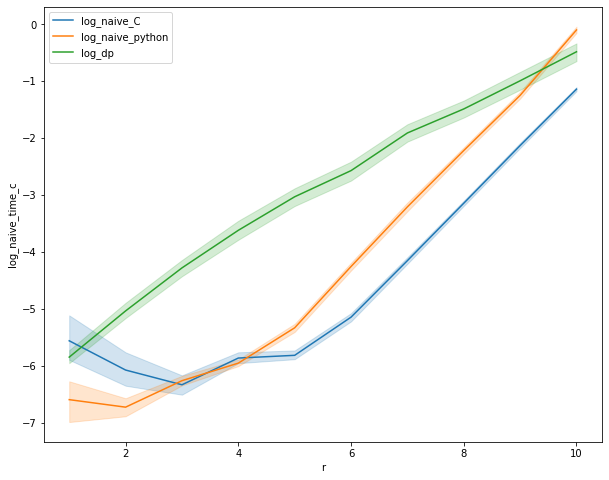

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=result_df, x="r", y="log_naive_time_c", ax=ax, label="log_naive_C")
sns.lineplot(data=result_df, x="r", y="log_naive_time_python", ax=ax, label="log_naive_python")
sns.lineplot(data=result_df, x="r", y="log_dp_time", ax=ax, label="log_dp")
plt.show()